In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy import stats

In [114]:
df = pd.read_csv('../input/drug-classification/drug200.csv')

In [115]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [117]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [118]:
df["Drug"].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [119]:
df['Sex'].value_counts()

M    104
F     96
Name: Sex, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Drug', ylabel='count'>

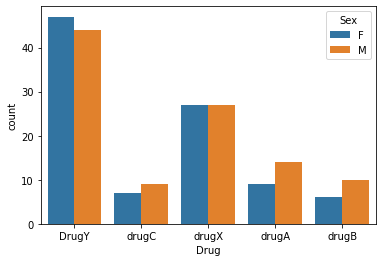

In [120]:
sns.countplot(df['Drug'],hue=df['Sex'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BP', ylabel='count'>

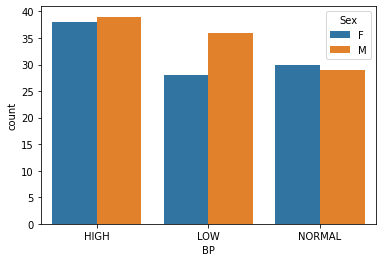

In [121]:
sns.countplot(df['BP'],hue=df['Sex'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Cholesterol', ylabel='count'>

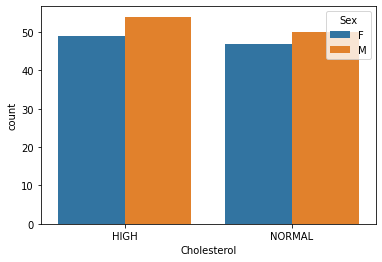

In [122]:
sns.countplot(df['Cholesterol'],hue=df['Sex'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Na_to_K'>

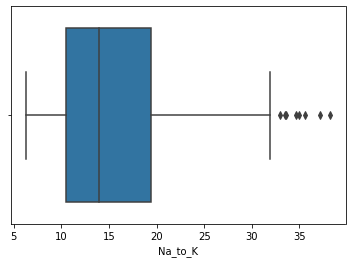

In [123]:
sns.boxplot(df['Na_to_K'])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Age'>

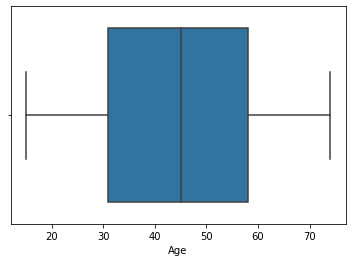

In [124]:
sns.boxplot(df['Age'])

In [125]:
from sklearn.preprocessing import LabelEncoder

In [126]:
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df['BP'] = label.fit_transform(df['BP'])
df['Cholesterol'] = label.fit_transform(df['Cholesterol'])
df['Drug'] = label.fit_transform(df['Drug'])


In [127]:
label.classes_

array(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'], dtype=object)

In [128]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


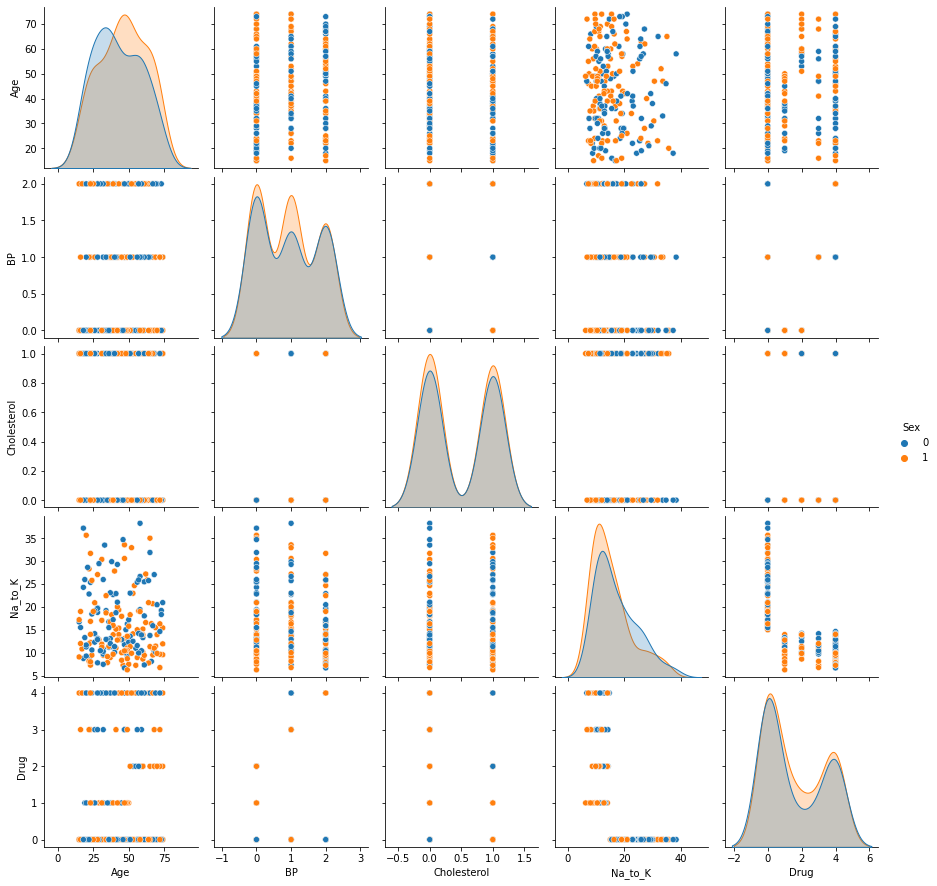

In [129]:
sns.pairplot(df,hue='Sex') # 0 label for female and 1 label for male

In [130]:
df.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


<AxesSubplot:>

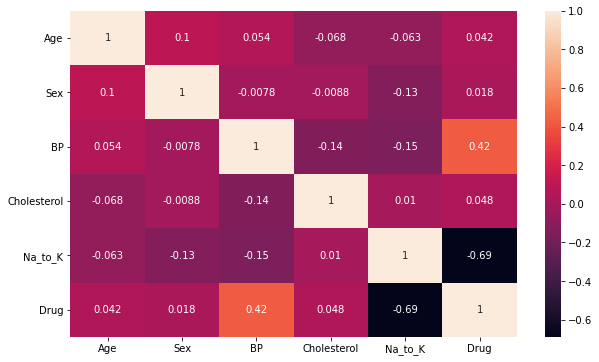

In [131]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

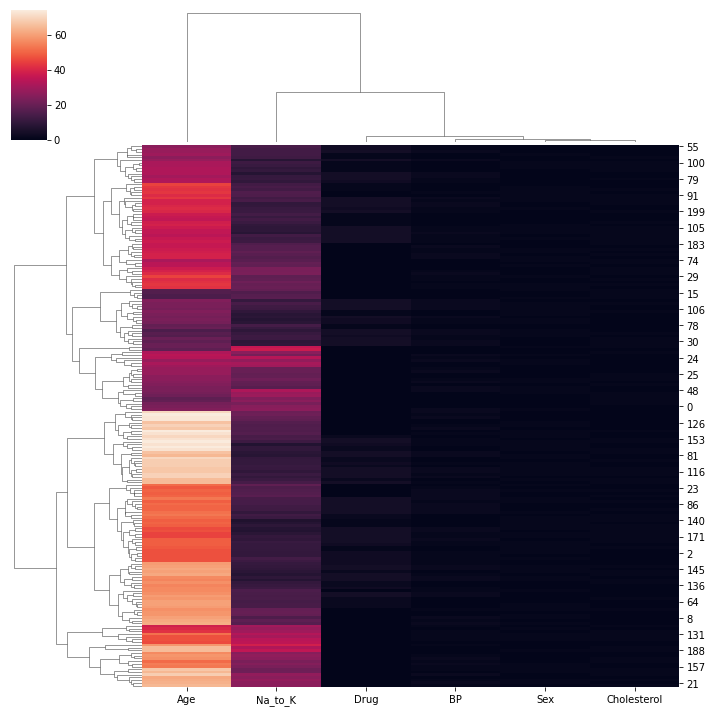

In [132]:
sns.clustermap(df)

In [133]:
from sklearn.model_selection import train_test_split

In [134]:
X = df.drop('Drug',axis=1)
y = df[['Drug']]

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
logit = LogisticRegression()
logit.fit(X_train,y_train)
prediction = logit.predict(X_test)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [138]:
logit.score(X_train,y_train)

0.9029850746268657

In [139]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [140]:
accuracy_score(y_test,prediction)

0.8333333333333334

In [141]:
confusion_matrix(y_test,prediction)

array([[27,  0,  1,  0,  1],
       [ 3,  4,  1,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 2,  0,  0,  1,  3],
       [ 0,  0,  0,  0, 19]])

In [142]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       1.00      0.50      0.67         8
           2       0.67      1.00      0.80         4
           3       1.00      0.17      0.29         6
           4       0.83      1.00      0.90        19

    accuracy                           0.83        66
   macro avg       0.87      0.72      0.71        66
weighted avg       0.86      0.83      0.80        66



<AxesSubplot:>

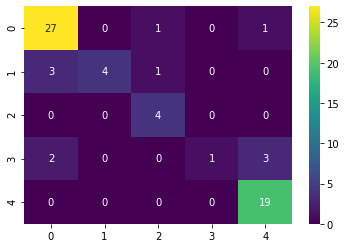

In [143]:
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap='viridis')

In [144]:
from sklearn.metrics import roc_curve, auc
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

In [145]:
# plot_multiclass_roc(logit,X_test,y_test, n_classes=5)


In [146]:
from sklearn.neighbors import KNeighborsClassifier

In [147]:
knn = KNeighborsClassifier(n_neighbors=5)

In [148]:
knn.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [149]:
knn_predict = knn.predict(X_test)

In [150]:
knn.score(X_train,y_train)

0.7985074626865671

In [151]:
accuracy_score(y_test,knn_predict)

0.696969696969697

In [152]:
test_error_rate=[]
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    error = 1-accuracy_score(y_test,knn_pred)
    test_error_rate.append(error)

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [153]:
error = pd.DataFrame(test_error_rate)

Text(0.5, 0, 'K Neighbors ')

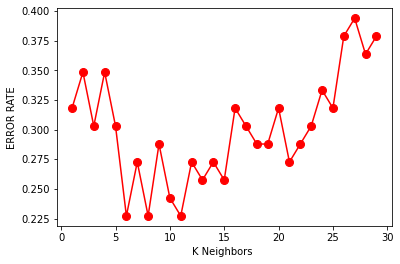

In [154]:
plt.plot(range(1,30),test_error_rate,marker='o',color='red',ms=8)
plt.ylabel('ERROR RATE')
plt.xlabel('K Neighbors ')

In [155]:
from sklearn.tree import DecisionTreeClassifier

In [156]:
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)
tree_pred = tree.predict(X_test)
tree.score(X_train,y_train)

1.0

In [157]:
accuracy_score(y_test,tree_pred)

1.0

In [158]:
confusion_matrix(y_test,tree_pred)

array([[29,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0],
       [ 0,  0,  4,  0,  0],
       [ 0,  0,  0,  6,  0],
       [ 0,  0,  0,  0, 19]])

<AxesSubplot:>

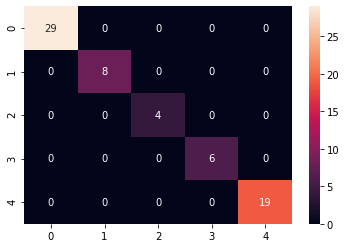

In [159]:
sns.heatmap(confusion_matrix(y_test,tree_pred),annot=True)

In [164]:
from six import StringIO    
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

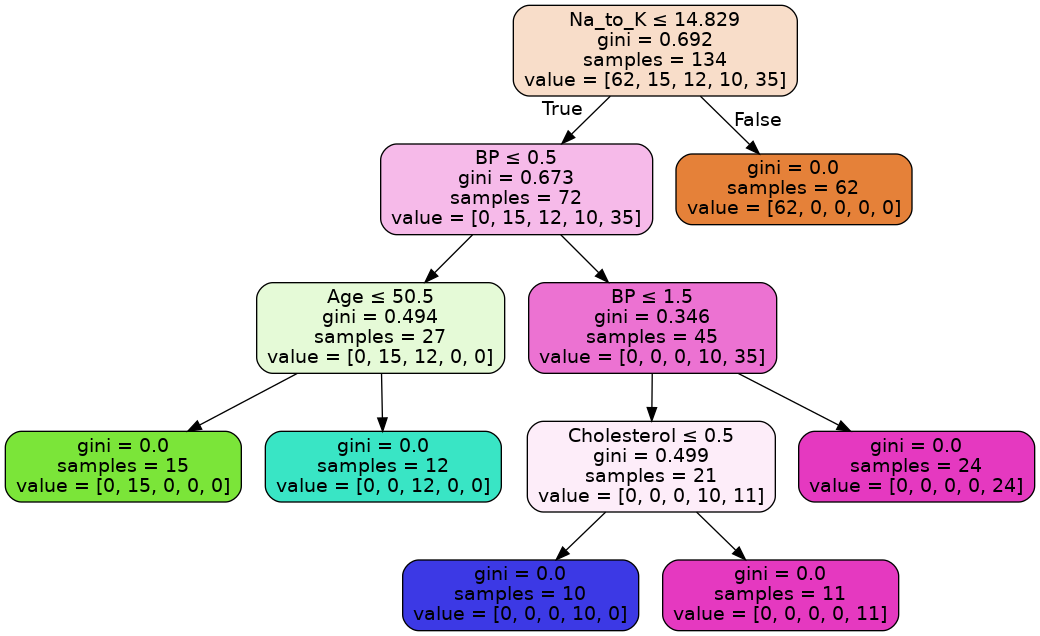

In [165]:
dot_data = StringIO()

export_graphviz(tree, out_file=dot_data, feature_names=['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], filled=True,rounded=True, special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())


graph.write_png('tree.png')

Image(graph.create_png())

In [196]:
import tensorflow as tf
from keras import layers

In [188]:
X_train.shape


(134, 5)

In [226]:
# model.add(tf.keras.layers.BatchNormalization())
# # model.add(keras.layers.Dense(5, activation='sigmoid'))

# model.add(keras.layers.Dense(1, input_shape=(134,5),activation='softmax'))
# model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
df['Drug'].nunique()
# from keras.callbacks import EarlyStopping
# early_stop = EarlyStopping(patience=5,monitor='val_loss')

In [239]:
model = keras.models.Sequential()
model.add(tf.keras.layers.BatchNormalization())

model.add(layers.Dense(5, kernel_initializer='uniform', input_shape=(5,)))
model.add(layers.Dropout(0.2))

model.add(layers.Activation('softmax'))

loss_fn = keras.losses.SparseCategoricalCrossentropy()
model.compile(loss=loss_fn, optimizer='RMSprop',metrics=['acc'])

In [240]:
model.fit(X_train,y_train,epochs=500,validation_data=(X_test,y_test),verbose=1)

Epoch 1/500
5/5 [==============================] - 1s 62ms/step - loss: 1.5928 - acc: 0.3041 - val_loss: 1.4773 - val_acc: 0.4848
Epoch 2/500
5/5 [==============================] - 0s 19ms/step - loss: 1.5711 - acc: 0.4206 - val_loss: 1.4533 - val_acc: 0.4697
Epoch 3/500
5/5 [==============================] - 0s 19ms/step - loss: 1.5605 - acc: 0.4604 - val_loss: 1.4391 - val_acc: 0.4394
Epoch 4/500
5/5 [==============================] - 0s 20ms/step - loss: 1.5531 - acc: 0.4940 - val_loss: 1.4331 - val_acc: 0.4394
Epoch 5/500
5/5 [==============================] - 0s 20ms/step - loss: 1.5374 - acc: 0.5391 - val_loss: 1.4213 - val_acc: 0.4545
Epoch 6/500
5/5 [==============================] - 0s 19ms/step - loss: 1.5299 - acc: 0.5815 - val_loss: 1.4127 - val_acc: 0.4697
Epoch 7/500
5/5 [==============================] - 0s 16ms/step - loss: 1.5267 - acc: 0.5719 - val_loss: 1.4073 - val_acc: 0.4697
Epoch 8/500
5/5 [==============================] - 0s 20ms/step - loss: 1.5160 - acc: 0.58

In [241]:
data = pd.DataFrame(model.history.history)

<AxesSubplot:>

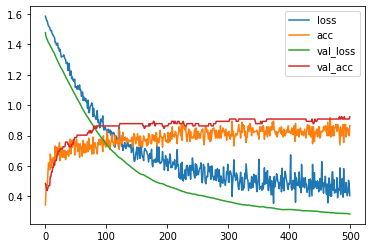

In [242]:
data.plot()

In [243]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.2845 - acc: 0.9242


[0.28453704714775085, 0.9242424368858337]

In [244]:
model.predict(X_test)

array([[5.59239164e-02, 6.33870512e-02, 1.80137753e-02, 3.27300057e-02,
        8.29945266e-01],
       [5.22495031e-01, 4.02875215e-01, 1.71721596e-02, 1.26203876e-02,
        4.48372848e-02],
       [4.51325206e-04, 6.84252358e-04, 2.40310401e-05, 9.87136737e-04,
        9.97853220e-01],
       [4.51082923e-02, 8.20753649e-02, 2.09942222e-01, 3.06210339e-01,
        3.56663823e-01],
       [1.00000000e+00, 1.31603706e-09, 2.77963483e-08, 4.60611593e-09,
        1.99487626e-08],
       [8.87218356e-01, 3.31338383e-02, 5.17412908e-02, 2.74870023e-02,
        4.19594318e-04],
       [9.99668717e-01, 2.46505806e-04, 4.30394321e-05, 1.52688845e-05,
        2.64212686e-05],
       [1.23743057e-01, 6.25396380e-03, 5.60804096e-04, 8.47634077e-02,
        7.84678757e-01],
       [1.25692442e-01, 4.81667846e-01, 2.77589262e-01, 3.98037732e-02,
        7.52465874e-02],
       [2.76175531e-04, 9.67060842e-05, 1.30355032e-03, 6.29508111e-04,
        9.97694075e-01],
       [5.30607514e-02, 7.1140

# Thank you